Firstly, we have to acquire the output voltage from 2.3 V to 2.7 V. and the corresponding VGS.
After that, we acquire the DC component V_GS:  2.474 V
We then plot the value of v_out/v_gs
From the second graph, we acquire that the amplification A_v is about -5.61 times at one end and -5.83 times at the other. This shows distortion in the signal.
The maximum for v_ac,in would be about +- 0.04 V


[]

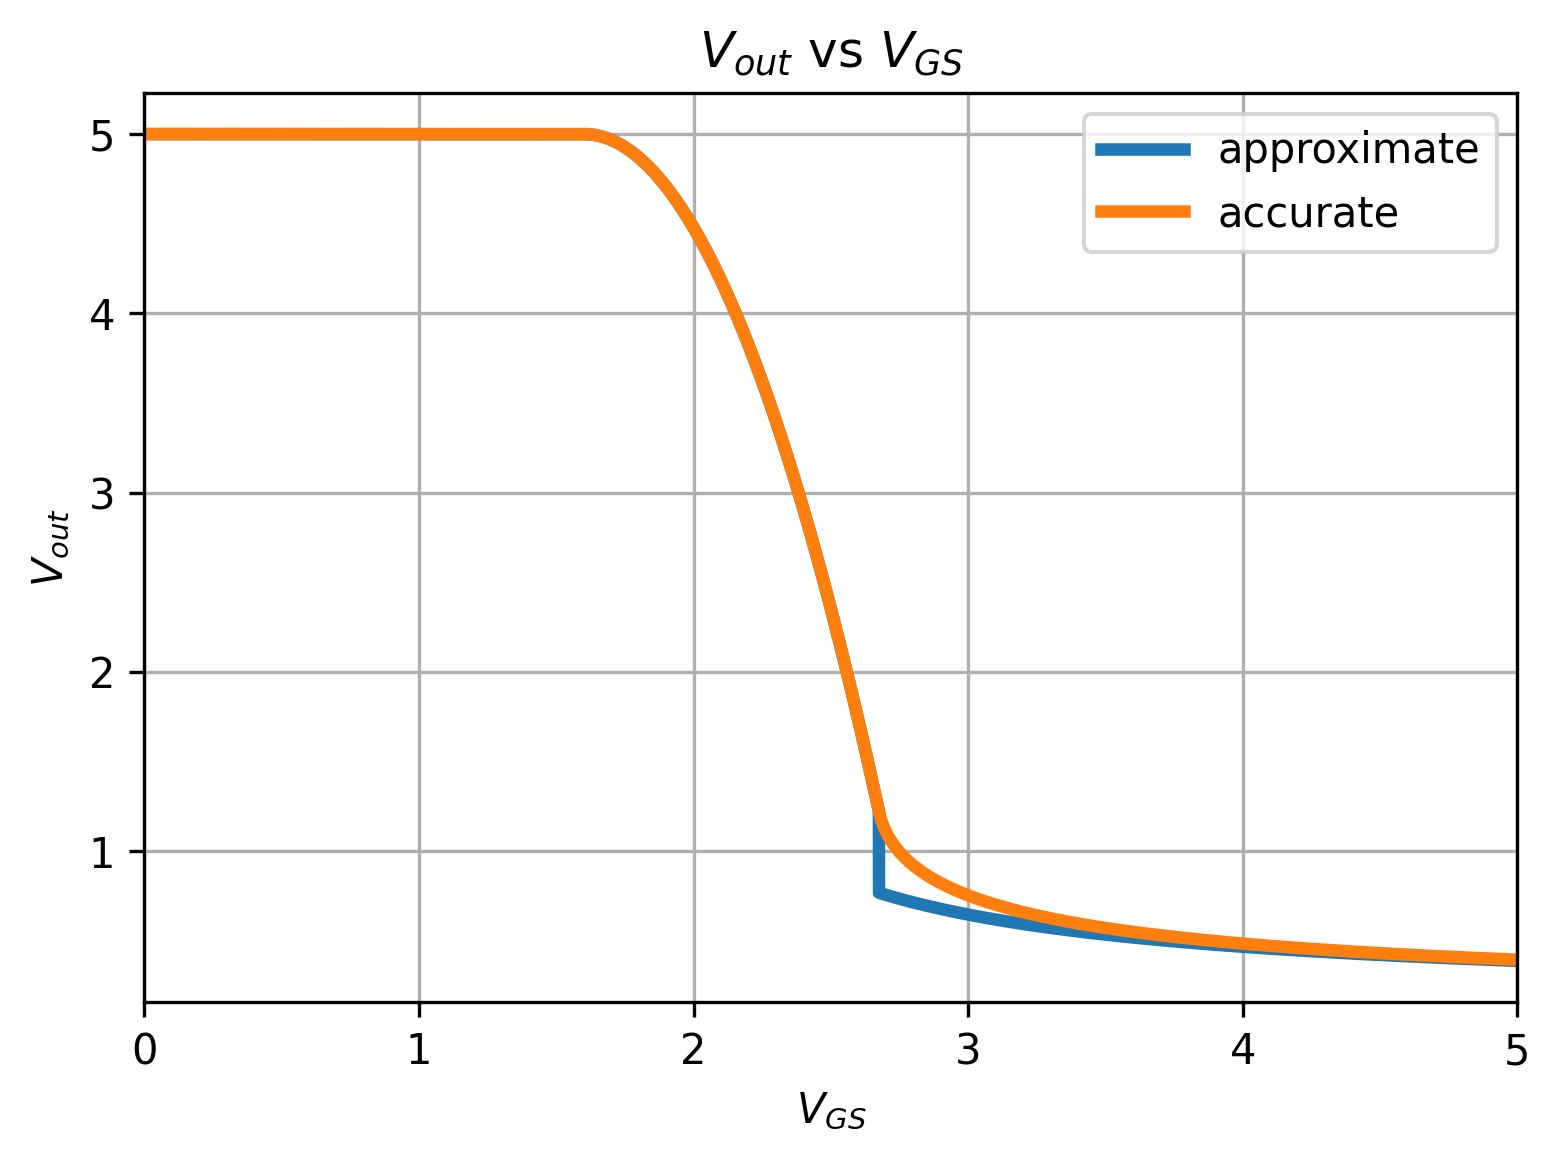

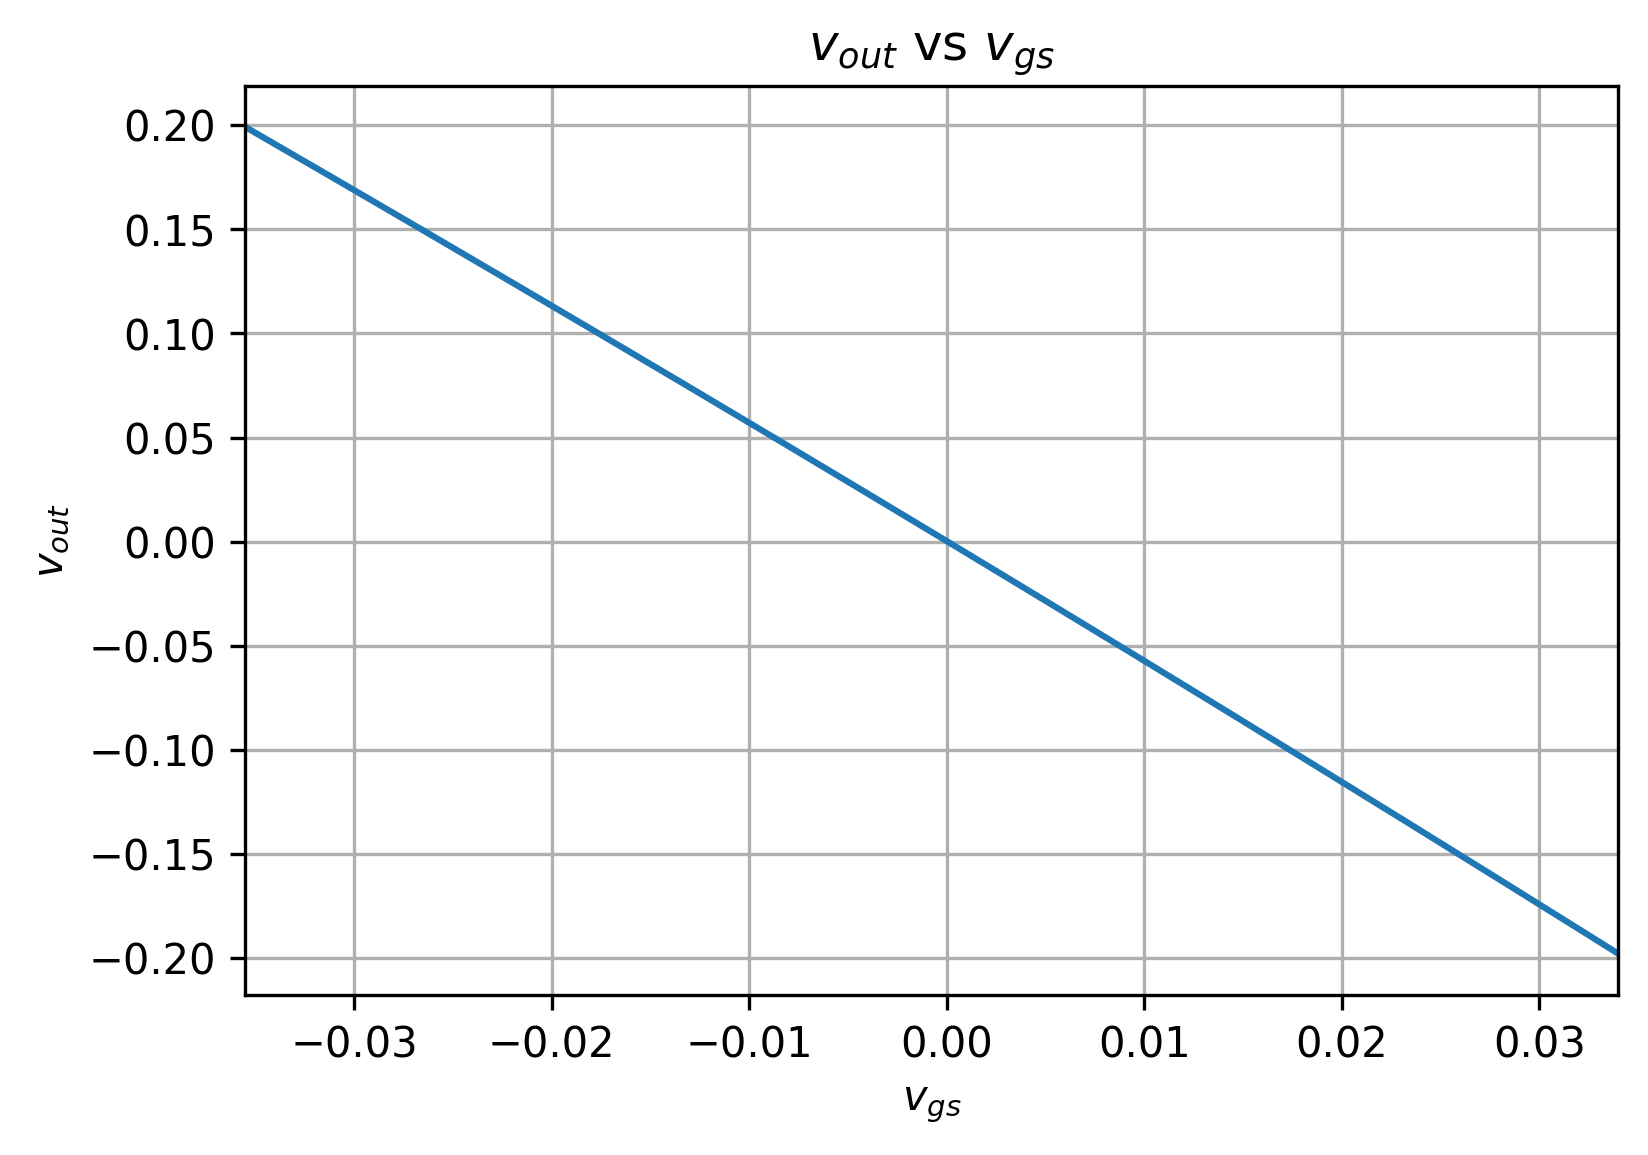

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

VDD = 5
RD = 20

# MOSFET parameters
VT = 1.6 # threshold voltage
K = 0.17
RS = 0.75 # intrinsic source resistance


# current in the saturation region
IDsat = lambda Vgs: K*(Vgs-VT)**2

#simple linear approximation for ohmic region
Ron = lambda VGS: 1/(2*K*(VGS-VT))

# accurate representation for the ohmic region
Id_real = lambda VDS, VGS:  K*(2*(VGS-VT)*VDS-VDS**2)

VGS = np.linspace(0, 5, 10001)

Id =  np.empty((2, len(VGS)))
VDS = np.empty((2, len(VGS)))

for i in range(len(VGS)):
      vgs = VGS[i]
      if vgs < VT: # sub-threshold region
        Id[0][i] = 0
        Id[1][i] = 0
      elif vgs-VT < VDD - RD*IDsat(vgs): # saturation region
        Id[0][i] = IDsat(vgs)
        Id[1][i] = IDsat(vgs)
      else: # ohmic region
        # approximate Id in the ohmic region
        Id[0][i] = VDD/(RD + Ron(vgs))
        # accurate Id in the ohmic region
        fun = lambda VDS: VDD - RD * Id_real(VDS, vgs) - VDS
        Vds = fsolve(fun, 0)
        Id[1][i] = Id_real(Vds, vgs)

      VDS[0][i] = VDD - RD * Id[0][i] + RS * Id[0][i]
      VDS[1][i] = VDD - RD * Id[1][i] + RS * Id[1][i]


Vout = VDS

print("Firstly, we have to acquire the output voltage from 2.3 V to 2.7 V. and the corresponding VGS.")
Vout_quiescent = np.array([V for V in Vout[1] if (V>2.3 and V<2.7)])
VGS_quiescent = np.array([VGS[i] for i,V in enumerate(Vout[1]) if (V>2.3 and V<2.7)])

VGS_mid = VGS_quiescent[np.argmin(np.abs(Vout_quiescent-2.5))]
print("After that, we acquire the DC component V_GS: ",VGS_mid, "V")


fig1, ax1 = plt.subplots(figsize=(15/2.54,10/2.54),dpi=300)

ax1.plot(VGS, Vout[0], linewidth=3, label='approximate')

ax1.plot(VGS, Vout[1], linewidth=3, label='accurate')

ax1.set_ylabel('$V_{out}$')
ax1.set_xlabel('$V_{GS}$')
ax1.set_xlim([VGS[0],VGS[-1]])
ax1.grid(True)

ax1.legend()
ax1.set_title("$V_{out}$ vs $V_{GS}$")

print("We then plot the value of v_out/v_gs")

fig2, ax2 = plt.subplots(figsize=(15/2.54,10/2.54),dpi=300)
ax2.plot(VGS_quiescent-VGS_mid,Vout_quiescent-2.5)
ax2.set_ylabel('$v_{out}$')
ax2.set_xlabel('$v_{gs}$')
ax2.set_xlim([VGS_quiescent[0]-VGS_mid,VGS_quiescent[-1]-VGS_mid])
ax2.grid(True)

#ax2.legend()
ax2.set_title("$v_{out}$ vs $v_{gs}$")


print(f"From the second graph, we acquire that the amplification A_v is about {((Vout_quiescent[0]-2.5)/(VGS_quiescent[0]-VGS_mid)):.2f} times at one end and {((Vout_quiescent[-1]-2.5)/(VGS_quiescent[-1]-VGS_mid)):.2f} times at the other. This shows distortion in the signal.")
print("The maximum for v_ac,in would be about +- 0.04 V")

plt.plot()